<a href="https://colab.research.google.com/github/D4deben/Projects-ML/blob/main/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# Regression FUnctions

In [63]:
#Common function for all classes


def Wmin_reg(dMatrix,y,lam):
  n=  dMatrix.shape[1]
  I=np.identity(n)
  return np.linalg.pinv((lam*I)+ dMatrix.T @ dMatrix) @ dMatrix.T @ y

def W_min(dMatrix,y):
  n=  dMatrix.shape[1]
  I=np.identity(n)
  return np.linalg.pinv( dMatrix.T @ dMatrix) @ dMatrix.T @ y

def predict(dMatrix,w):
  return dMatrix @ w

def ERMS(y,y_pred):
  return np.sqrt(np.mean((y-y_pred)**2))

# Ques 1: Curve Fitting


In [96]:
def loaddata(s):
  df = pd.read_csv(s)
  X=df['X'].values.reshape(-1,1)
  Y=df['y'].values
  return X,Y


#Design matrix for d=1
def design_matrix(X,degree):
  dmatrix= np.ones((X.shape[0],degree+1))
  n=X.shape[0]
  for i in range(degree+1):
    dmatrix[:,i]=X[:,0]**(i)
  return dmatrix

In [65]:


def true_vs_predicted(true, prediction, title='Scatter plot of True vs. Predicted Values'):
    """
    Plots a scatter plot of true vs. predicted values.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(true, prediction, alpha=0.6)
    plt.plot([min(true), max(true)], [min(true), max(true)], 'r--', lw=2)  # Line of equality
    plt.axis('equal')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.grid(True)
    plt.show()


def act_scatter_pred_line_full(x, y, w_star, M):

    # Scatter plot of actual data
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, label="Actual", color="red", alpha=0.6)

    # Generate a linspace of x points for prediction
    x_linspace = np.linspace(min(x), max(x), 500).reshape(-1, 1)

    # Compute the design matrix and predictions
    Phi_linspace = design_matrix(x_linspace, M)
    y_pred = predict(Phi_linspace, w_star)

    # Plot the prediction line
    plt.plot(x_linspace, y_pred, label="Prediction", color="blue")
    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.title(f'Scatter of Actual Data with Prediction Lines (Degree={M})')
    plt.legend()
    plt.grid(True)
    plt.show()

def act_scatter_pred_line_full_both(x, y, w_star_wo_reg, w_star_with_reg, M):

    # Scatter plot of actual data
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, label="Actual", color="red", alpha=0.6)

    # Generate a linspace of x points for prediction
    x_linspace = np.linspace(min(x), max(x), 500).reshape(-1, 1)

    # Compute the design matrix and predictions
    Phi_linspace = design_matrix(x_linspace, M)
    y_pred_wo_reg = predict(Phi_linspace, w_star_wo_reg)
    y_pred_with_reg = predict(Phi_linspace, w_star_with_reg)

    # Plot the prediction line
    plt.plot(x_linspace, y_pred_wo_reg, label="Prediction (No Regularization)", color="blue")
    plt.plot(x_linspace, y_pred_with_reg, label="Prediction (With Regularization)", color="green", linestyle='--')

    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.title(f'Scatter of Actual Data with Prediction Lines (Degree={M})')
    plt.legend()
    plt.grid(True)
    plt.show()


In [97]:

train_loc_a='/content/drive/MyDrive/PRML/team14/dataset1/train_1a.csv'
train_loc_b='/content/drive/MyDrive/PRML/team14/dataset1/train_1b.csv'
v_loc='/content/drive/MyDrive/PRML/team14/dataset1/validation.csv'
test_loc='/content/drive/MyDrive/PRML/team14/dataset1/test.csv'

X_train,Y_train=loaddata(train_loc_a)
X_val,Y_val=loaddata(v_loc)
X_test,Y_test=loaddata(test_loc)

In [98]:
M_list=[3,6,9]
lam_list=[0.001,0.1,1]


In [99]:

for M in M_list:
  for lam in lam_list:
    print("degree: ",M," lambda: ",lam)
    dMatrix_train=design_matrix(X_train,M)
    dMatrix_test=design_matrix(X_test,M)
    dMatrix_val=design_matrix(X_val,M)
    w=W_min(dMatrix_train,Y_train)
    w_reg=Wmin_reg(dMatrix_train,Y_train,lam)
    train_pred=predict(dMatrix_train,w)
    test_pred=predict(dMatrix_test,w)
    val_pred=predict(dMatrix_val,w)
    train_pred_reg=predict(dMatrix_train,w_reg)
    test_pred_reg=predict(dMatrix_test,w_reg)
    val_pred_reg=predict(dMatrix_val,w_reg)
    train_err=ERMS(Y_train,train_pred)
    test_err=ERMS(Y_test,test_pred)
    val_err=ERMS(Y_val,val_pred)
    train_err_reg=ERMS(Y_train,train_pred_reg)
    test_err_reg=ERMS(Y_test,test_pred_reg)
    print("train error is: ",train_err," test error is: ",test_err, "Val error is: ", val_err)
    print("train error is: ",train_err_reg," test error is: ",test_err_reg)

degree:  3  lambda:  0.001
train error is:  0.2833775885977142  test error is:  0.5783731002825603 Val error is:  0.6690687114838583
train error is:  0.2836800166297241  test error is:  0.6164154278084024
degree:  3  lambda:  0.1
train error is:  0.2833775885977142  test error is:  0.5783731002825603 Val error is:  0.6690687114838583
train error is:  0.3076843300168734  test error is:  0.6358463052709145
degree:  3  lambda:  1
train error is:  0.2833775885977142  test error is:  0.5783731002825603 Val error is:  0.6690687114838583
train error is:  0.35058224086721335  test error is:  0.568213794829127
degree:  6  lambda:  0.001
train error is:  0.25371003679426407  test error is:  42.20110065273457 Val error is:  27.785588353552022
train error is:  0.28087710750647427  test error is:  0.7522093674185538
degree:  6  lambda:  0.1
train error is:  0.25371003679426407  test error is:  42.20110065273457 Val error is:  27.785588353552022
train error is:  0.30665939359934424  test error is:  

In [100]:
degrees = [3, 6, 9]
lambdas = [0.001, 0.1, 1]

results = []
min_erms = float('inf')
best_M = None
best_lambda = None
for degree in degrees:
    DesignMatrix_train = design_matrix(X_train, degree)
    DesignMatrix_val = design_matrix(X_val, degree)
    DesignMatrix_test = design_matrix(X_test, degree)

    w = W_min(DesignMatrix_train, Y_train)

    y_pred_train = predict(DesignMatrix_train, w)
    y_pred_val = predict(DesignMatrix_val, w)
    y_pred_test = predict(DesignMatrix_test, w)

    train_err = ERMS(Y_train, y_pred_train)
    val_err = ERMS(Y_val, y_pred_val)
    test_err = ERMS(Y_test, y_pred_test)
    if test_err < min_erms:
      min_erms = test_err
      best_M = degree
      best_lambda = 'None'

    results.append([degree, 'None', train_err, val_err, test_err])

degree = 9
for lambda_reg in lambdas:
    DesignMatrix_train = design_matrix(X_train, degree)
    DesignMatrix_val = design_matrix(X_val, degree)
    DesignMatrix_test = design_matrix(X_test, degree)

    w_reg = Wmin_reg(DesignMatrix_train, Y_train, lambda_reg)

    y_pred_train = predict(DesignMatrix_train, w_reg)
    y_pred_val = predict(DesignMatrix_val, w_reg)
    y_pred_test = predict(DesignMatrix_test, w_reg)

    train_err = ERMS(Y_train, y_pred_train)
    val_err = ERMS(Y_val, y_pred_val)
    test_err = ERMS(Y_test, y_pred_test)
    if test_err < min_erms:
      min_erms = test_err
      best_M = degree
      best_lambda = lambda_reg
    results.append([degree, lambda_reg, train_err, val_err, test_err])

df_results = pd.DataFrame(results, columns=['Degree', 'λ',
                                            'ERMS (Train)', 'ERMS (Val)', 'ERMS (Test)'])

print(df_results)
print("\n")
print(f"Best Model is with M={best_M} and lambda={best_lambda} with test error of {min_erms}")

   Degree      λ  ERMS (Train)    ERMS (Val)   ERMS (Test)
0       3   None      0.283378      0.669069      0.578373
1       6   None      0.253710     27.785588     42.201101
2       9   None      0.074845  65448.685458  41671.182016
3       9  0.001      0.280719      0.539594      0.906058
4       9    0.1      0.306639      0.560843      0.662793
5       9      1      0.350065      0.635140      0.567244


Best Model is with M=9 and lambda=1 with test error of 0.5672438301246967


Train_err 0.2833775885977142
val_err 0.6690687114838583
test_err 0.5783731002825603


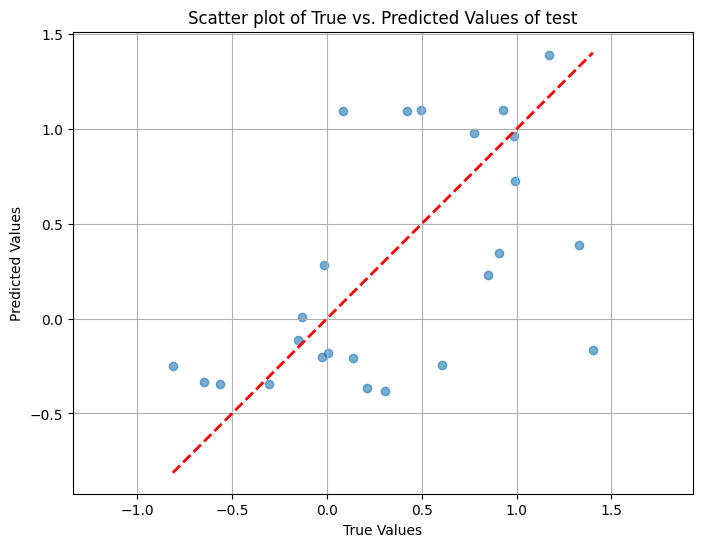

Train Data Scatter Plot For M=3


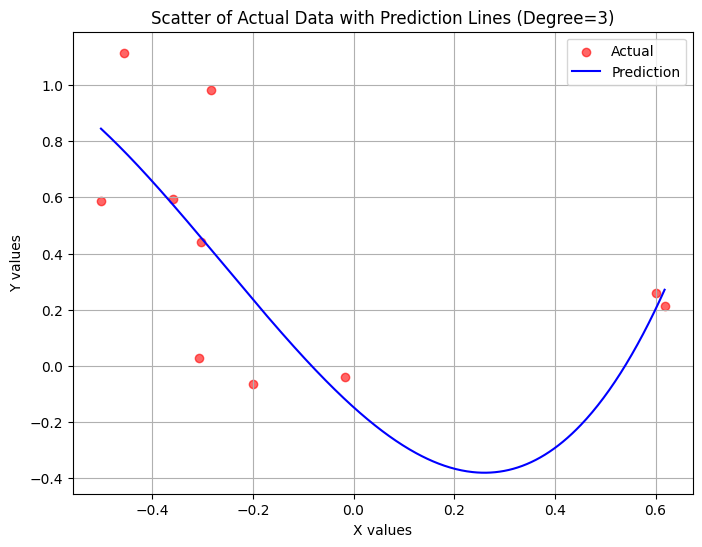

Test Data Scatter Plot For M=3


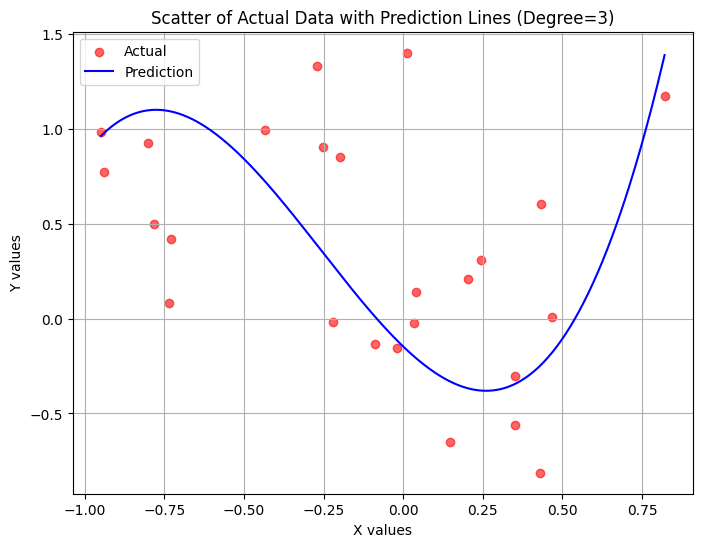

In [70]:
M=3
DesignMatrix= design_matrix(X_train,M)
w=W_min(DesignMatrix,Y_train)
#w_reg=Wmin_reg(DesignMatrix,Y_train,lam)
y_pred=predict(DesignMatrix,w)
Train_err=ERMS(Y_train,y_pred)
print("Train_err",Train_err)
Val_DesignMatrix= design_matrix(X_val,M)
yval_pred=predict(Val_DesignMatrix,w)
val_err=ERMS(Y_val,yval_pred)
print("val_err",val_err)
test_DesignMatrix= design_matrix(X_test,M)
ytest_pred=predict(test_DesignMatrix,w)
test_err=ERMS(Y_test,ytest_pred)
print("test_err",test_err)
true_vs_predicted(Y_test, ytest_pred, title='Scatter plot of True vs. Predicted Values of test')
print("Train Data Scatter Plot For M=3")
act_scatter_pred_line_full(X_train, Y_train, w, M,)
print("Test Data Scatter Plot For M=3")
act_scatter_pred_line_full(X_test, Y_test, w, M,)


Train_err 0.25371003679426407
val_err 27.785588353552022
test_err 42.20110065273457


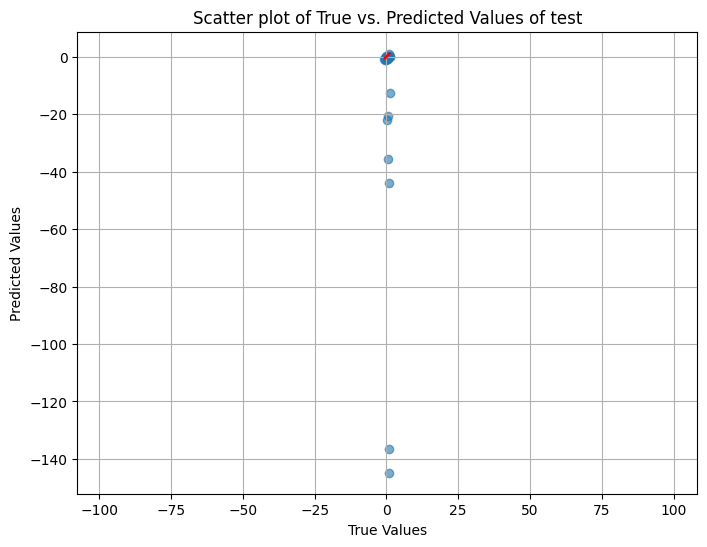

Train Data Scatter Plot For M= 6


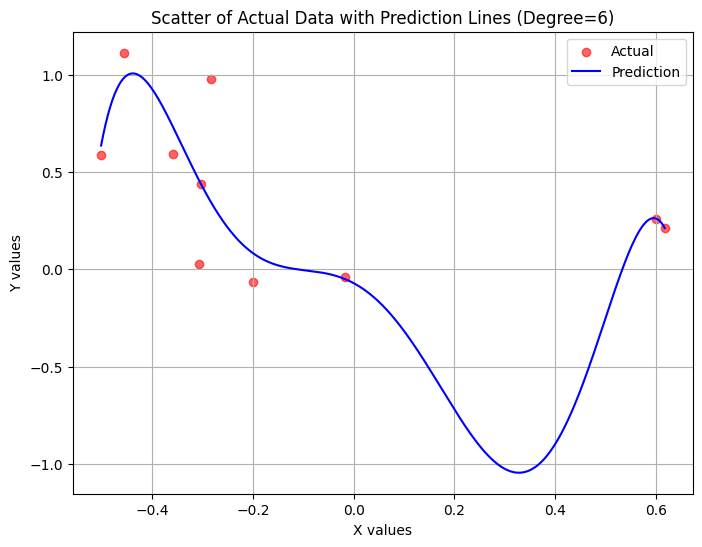

Test Data Scatter Plot For M= 6


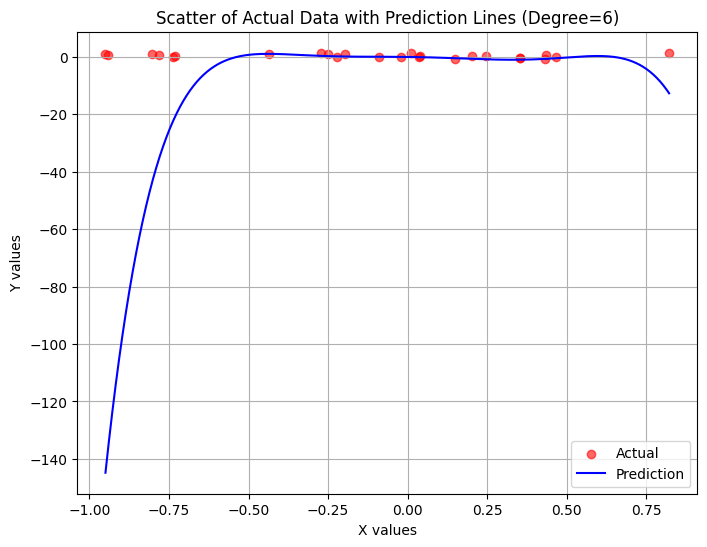

In [71]:
M=6
DesignMatrix= design_matrix(X_train,M)
w=W_min(DesignMatrix,Y_train)
#w_reg=Wmin_reg(DesignMatrix,Y_train,lam)
y_pred=predict(DesignMatrix,w)
Train_err=ERMS(Y_train,y_pred)
print("Train_err",Train_err)
Val_DesignMatrix= design_matrix(X_val,M)
yval_pred=predict(Val_DesignMatrix,w)
val_err=ERMS(Y_val,yval_pred)
print("val_err",val_err)
test_DesignMatrix= design_matrix(X_test,M)
ytest_pred=predict(test_DesignMatrix,w)
test_err=ERMS(Y_test,ytest_pred)
print("test_err",test_err)
true_vs_predicted(Y_test, ytest_pred, title='Scatter plot of True vs. Predicted Values of test')
print("Train Data Scatter Plot For M=",M)
act_scatter_pred_line_full(X_train, Y_train, w, M,)
print("Test Data Scatter Plot For M=",M)
act_scatter_pred_line_full(X_test, Y_test, w, M,)


Train_err 0.0748447827720847
val_err 65448.68545802197
test_err 41671.18201586226


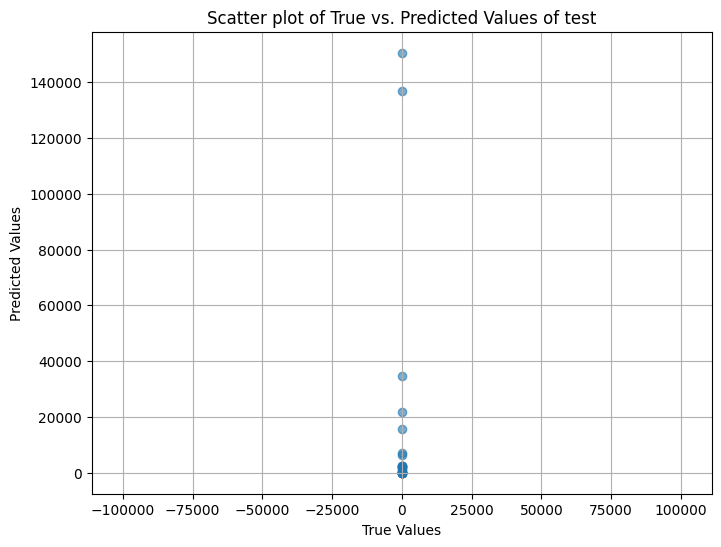

Train Data Scatter Plot For M= 9


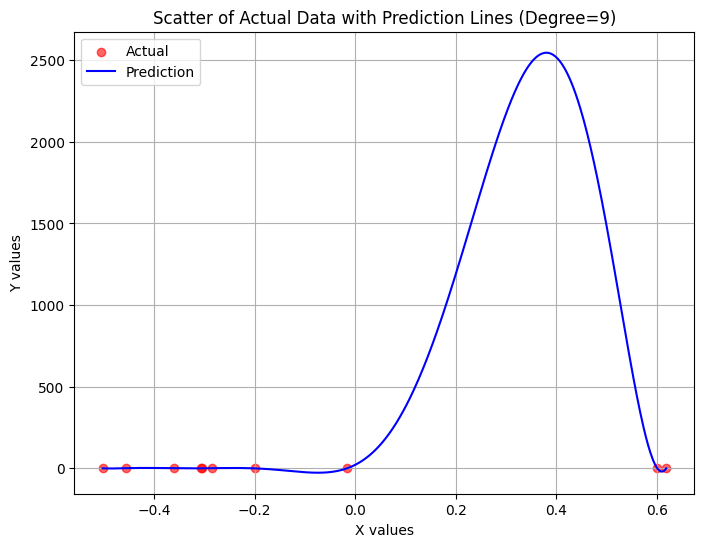

Test Data Scatter Plot For M= 9


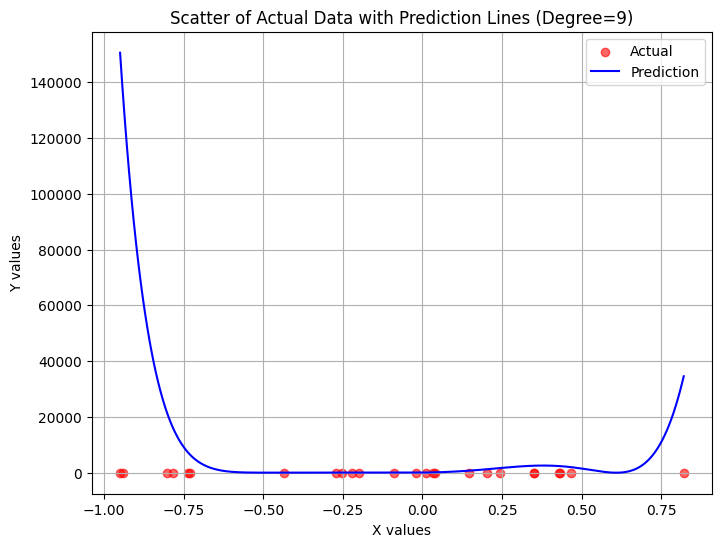

In [72]:
M=9
DesignMatrix= design_matrix(X_train,M)
w=W_min(DesignMatrix,Y_train)
#w_reg=Wmin_reg(DesignMatrix,Y_train,lam)
y_pred=predict(DesignMatrix,w)
Train_err=ERMS(Y_train,y_pred)
print("Train_err",Train_err)
Val_DesignMatrix= design_matrix(X_val,M)
yval_pred=predict(Val_DesignMatrix,w)
val_err=ERMS(Y_val,yval_pred)
print("val_err",val_err)
test_DesignMatrix= design_matrix(X_test,M)
ytest_pred=predict(test_DesignMatrix,w)
test_err=ERMS(Y_test,ytest_pred)
print("test_err",test_err)
true_vs_predicted(Y_test, ytest_pred, title='Scatter plot of True vs. Predicted Values of test')
print("Train Data Scatter Plot For M=",M)
act_scatter_pred_line_full(X_train, Y_train, w, M,)
print("Test Data Scatter Plot For M=",M)
act_scatter_pred_line_full(X_test, Y_test, w, M,)


Train_err 0.2807193981328566
val_err 0.5395940455250803
test_err 0.9060584280595738


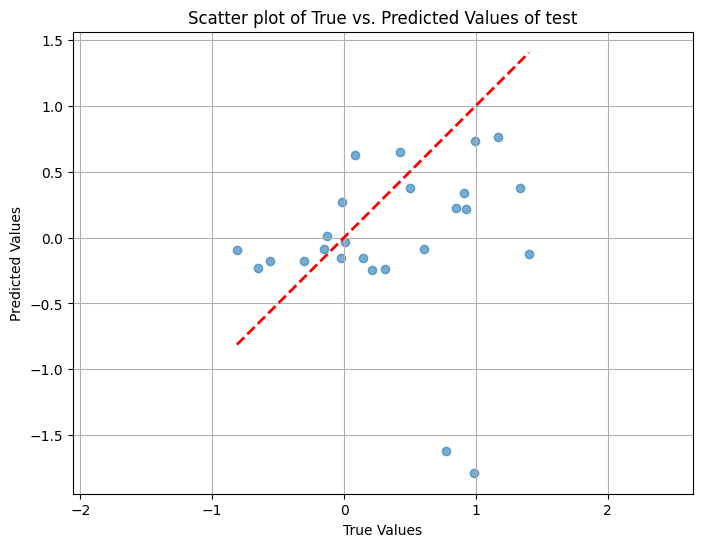

Train Data Scatter Plot For M=9 and Lambda=0.001


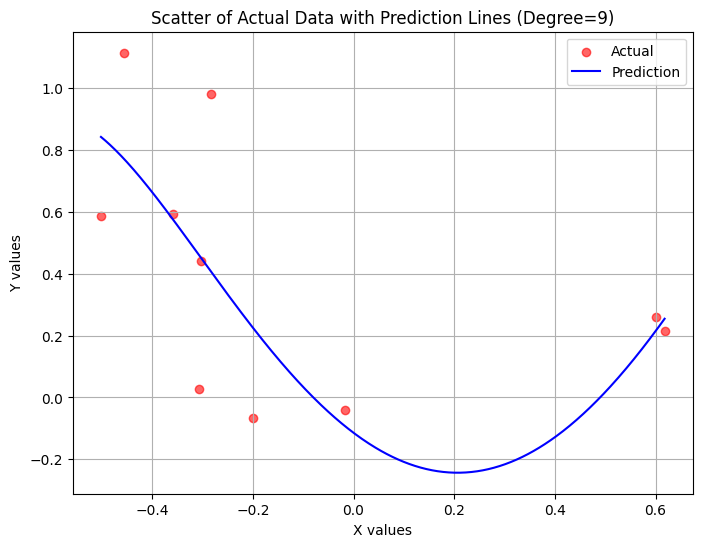

Test Data Scatter Plot For M=9 and Lambda= 0.001


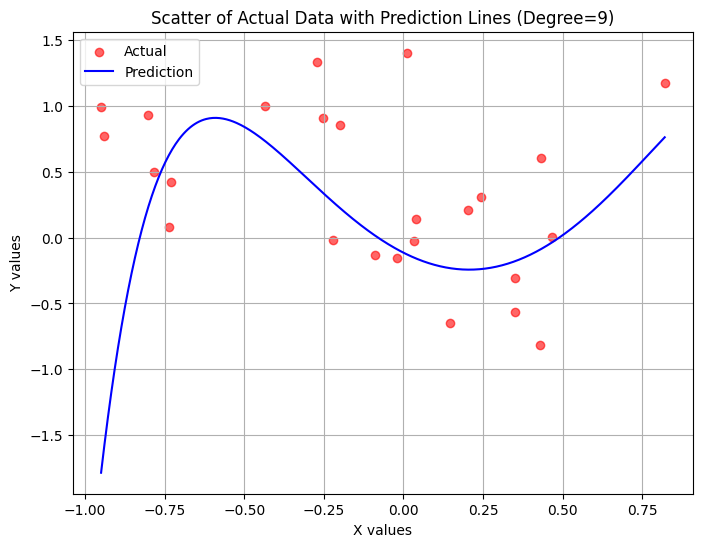

In [73]:
M=9
lam=0.001
DesignMatrix= design_matrix(X_train,M)
w=Wmin_reg(DesignMatrix,Y_train,lam)
w_no_reg=W_min(DesignMatrix,Y_train)
y_pred=predict(DesignMatrix,w)
Train_err=ERMS(Y_train,y_pred)
print("Train_err",Train_err)
Val_DesignMatrix= design_matrix(X_val,M)
yval_pred=predict(Val_DesignMatrix,w)
val_err=ERMS(Y_val,yval_pred)
print("val_err",val_err)
test_DesignMatrix= design_matrix(X_test,M)
ytest_pred=predict(test_DesignMatrix,w)
test_err=ERMS(Y_test,ytest_pred)
print("test_err",test_err)
true_vs_predicted(Y_test, ytest_pred, title='Scatter plot of True vs. Predicted Values of test')
print(f"Train Data Scatter Plot For M={M} and Lambda={lam}")
act_scatter_pred_line_full(X_train, Y_train, w, M,)
print(f"Test Data Scatter Plot For M={M} and Lambda= {lam}")
act_scatter_pred_line_full(X_test, Y_test, w, M,)


Train_err 0.3066387583858373
val_err 0.5608426734736432
test_err 0.6627928166885882


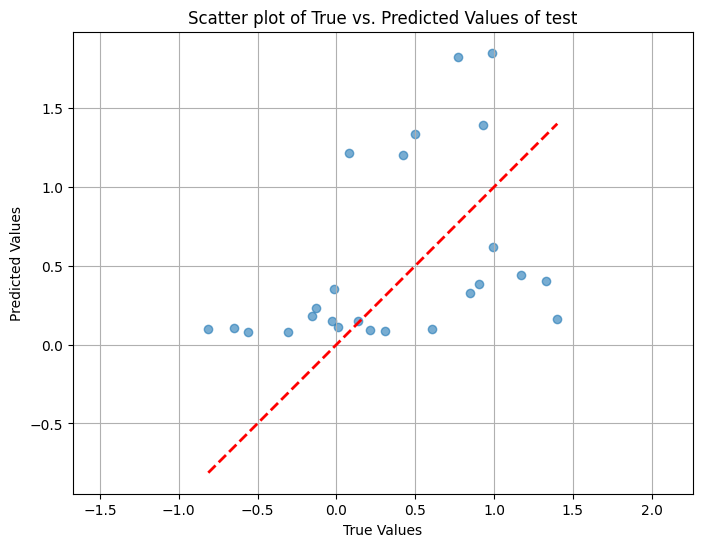

Train Data Scatter Plot For M=9 and Lambda=0.1


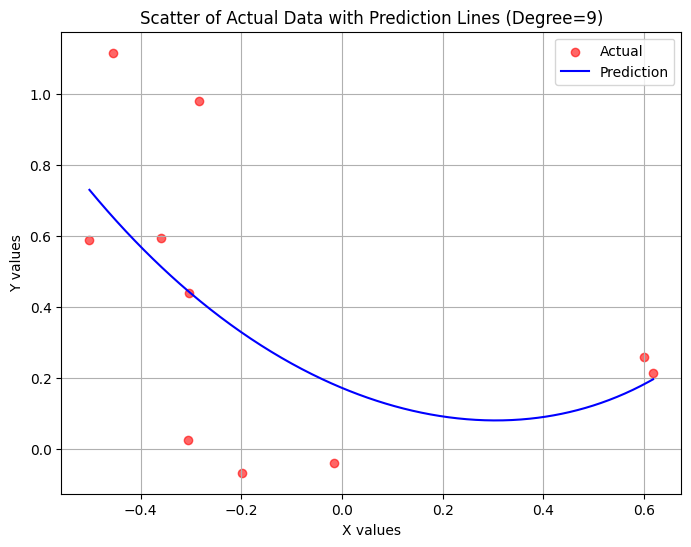

Test Data Scatter Plot For M=9 and Lambda= 0.1


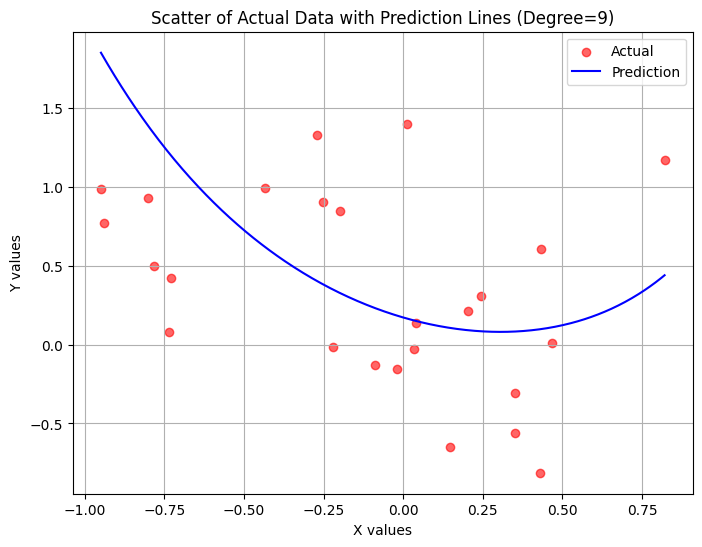

In [74]:
M=9
lam=0.1
DesignMatrix= design_matrix(X_train,M)
w=Wmin_reg(DesignMatrix,Y_train,lam)
y_pred=predict(DesignMatrix,w)
Train_err=ERMS(Y_train,y_pred)
print("Train_err",Train_err)
Val_DesignMatrix= design_matrix(X_val,M)
yval_pred=predict(Val_DesignMatrix,w)
val_err=ERMS(Y_val,yval_pred)
print("val_err",val_err)
test_DesignMatrix= design_matrix(X_test,M)
ytest_pred=predict(test_DesignMatrix,w)
test_err=ERMS(Y_test,ytest_pred)
print("test_err",test_err)
true_vs_predicted(Y_test, ytest_pred, title='Scatter plot of True vs. Predicted Values of test')
print(f"Train Data Scatter Plot For M={M} and Lambda={lam}")
act_scatter_pred_line_full(X_train, Y_train, w, M,)
print(f"Test Data Scatter Plot For M={M} and Lambda= {lam}")
act_scatter_pred_line_full(X_test, Y_test, w, M,)


Train_err 0.3500646728457063
val_err 0.635140420868518
test_err 0.5672438301246967


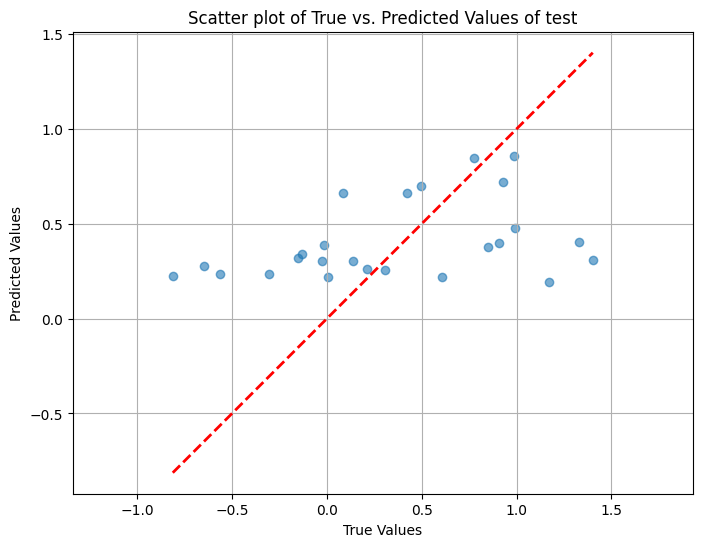

Train Data Scatter Plot For M=9 and Lambda=1


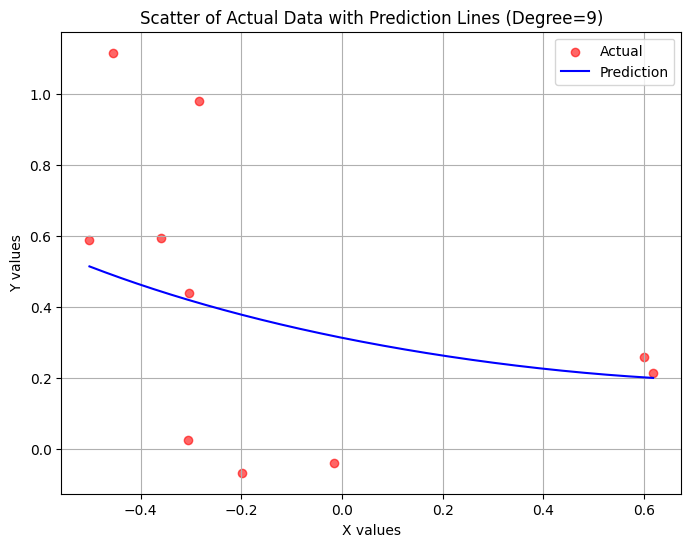

Test Data Scatter Plot For M=9 and Lambda= 1


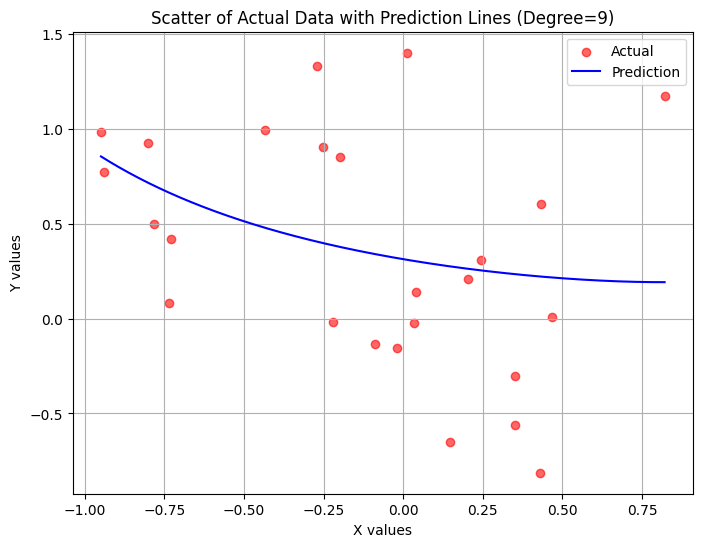

In [75]:
M=9
lam=1
DesignMatrix= design_matrix(X_train,M)
w=Wmin_reg(DesignMatrix,Y_train,lam)
y_pred=predict(DesignMatrix,w)
Train_err=ERMS(Y_train,y_pred)
print("Train_err",Train_err)
Val_DesignMatrix= design_matrix(X_val,M)
yval_pred=predict(Val_DesignMatrix,w)
val_err=ERMS(Y_val,yval_pred)
print("val_err",val_err)
test_DesignMatrix= design_matrix(X_test,M)
ytest_pred=predict(test_DesignMatrix,w)
test_err=ERMS(Y_test,ytest_pred)
print("test_err",test_err)
true_vs_predicted(Y_test, ytest_pred, title='Scatter plot of True vs. Predicted Values of test')
print(f"Train Data Scatter Plot For M={M} and Lambda={lam}")
act_scatter_pred_line_full(X_train, Y_train, w, M,)
print(f"Test Data Scatter Plot For M={M} and Lambda= {lam}")
act_scatter_pred_line_full(X_test, Y_test, w, M,)


# Question 2

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [103]:
def loaddata(s):
  df = pd.read_csv(s)
  X=df[['x1','x2']].values.reshape(-1,2)
  Y=df['output'].values.reshape(-1,1)
  return X,Y

def design_matrix_2D(X, degree):

    n_samples = X.shape[0]
    n_features = (degree + 1) * (degree + 2) // 2

    dmatrix = np.ones((n_samples, n_features))

    col_idx = 1  # Start from 1 since the 0th column is the bias term

    for i in range(1, degree + 1):
        for j in range(i + 1):
            dmatrix[:, col_idx] = (X[:, 0]**(i-j)) * (X[:, 1]**j)
            col_idx += 1

    return dmatrix

train_loc='/content/drive/MyDrive/PRML/team14/dataset2/Train-2a-25.csv'
X_train,Y_train=loaddata(train_loc)
v_loc='/content/drive/MyDrive/PRML/team14/dataset2/Val-50.csv'
X_val,Y_val=loaddata(v_loc)
test_loc='/content/drive/MyDrive/PRML/team14/dataset2/Test-50.csv'
X_test,Y_test=loaddata(test_loc)


def plot_3d(X_true, t_true, p, w_star, colormap='viridis', alpha=0.7, x_label='X', y_label='Y', z_label='Z'):

    # Validate input dimensions
    if X_true.shape[1] != 2:
        raise ValueError("X_true must have exactly 2 columns.")
    if t_true.shape[1] != 1:
        raise ValueError("t_true must be a 1-dimensional array.")

    # Define grid for X and Y using the range of X_true
    X_range = np.arange(np.min(X_true[:, 0]), np.max(X_true[:, 0]), 0.25)
    Y_range = np.arange(np.min(X_true[:, 1]), np.max(X_true[:, 1]), 0.25)
    X, Y = np.meshgrid(X_range, Y_range)

    # Prepare data for prediction
    M = np.c_[X.ravel(), Y.ravel()]  # Combine X and Y columns for input matrix

    # Calculate the design matrix and predictions
    Phi = design_matrix_2D(M, p)
    result = predict(Phi, w_star)
    result_reshaped = result.reshape(X.shape)

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(X_true[:, 0], X_true[:, 1], t_true.flatten(), color='red', label='True Data')

    ax.plot_surface(X, Y, result_reshaped, cmap=colormap, alpha=alpha)

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel(z_label)
    ax.set_title('3D Plot of True vs. Predicted Values')

    plt.legend()
    plt.show()

def true_vs_predicted(true, prediction, title='Scatter plot of True vs. Predicted Values'):
    """
    Plots a scatter plot of true vs. predicted values.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(true, prediction, alpha=0.6)
    plt.plot([min(true), max(true)], [min(true), max(true)], 'r--', lw=2)  # Line of equality
    plt.axis('equal')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.grid(True)
    plt.show()


Another Training dataset 2b

In [104]:
train_loc='/content/drive/MyDrive/PRML/team14/dataset2/Train-2b-100.csv'
X_train,Y_train=loaddata(train_loc)
v_loc='/content/drive/MyDrive/PRML/team14/dataset2/Val-50.csv'
X_val,Y_val=loaddata(v_loc)
test_loc='/content/drive/MyDrive/PRML/team14/dataset2/Test-50.csv'
X_test,Y_test=loaddata(test_loc)

Train_err: 2766.9750334349096
val_err 2270.6002453024857
test_err 2049.7135793430493


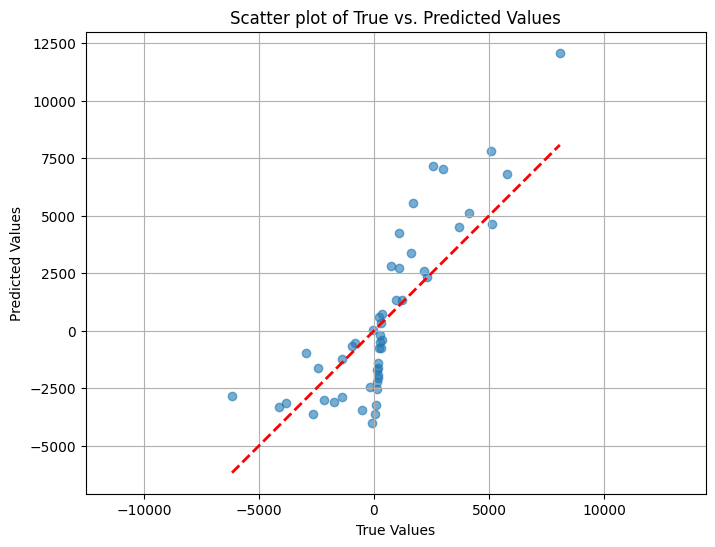

3D plot for Train data


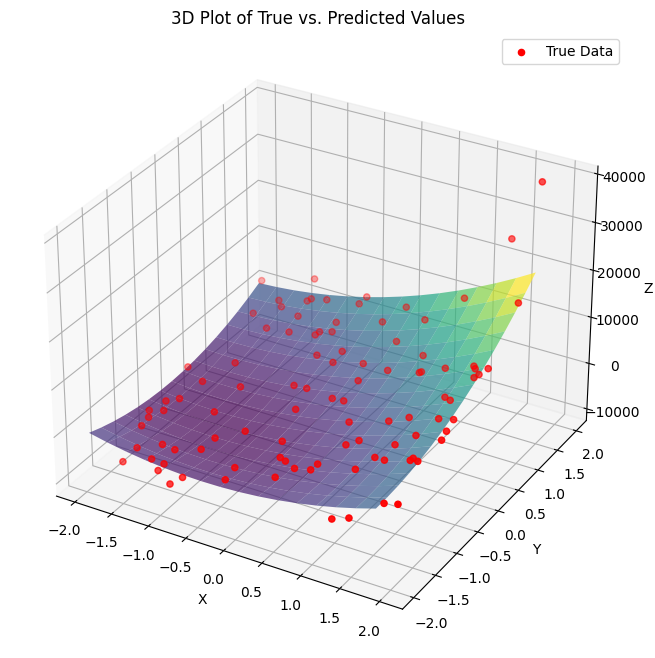

3D plot for Test data


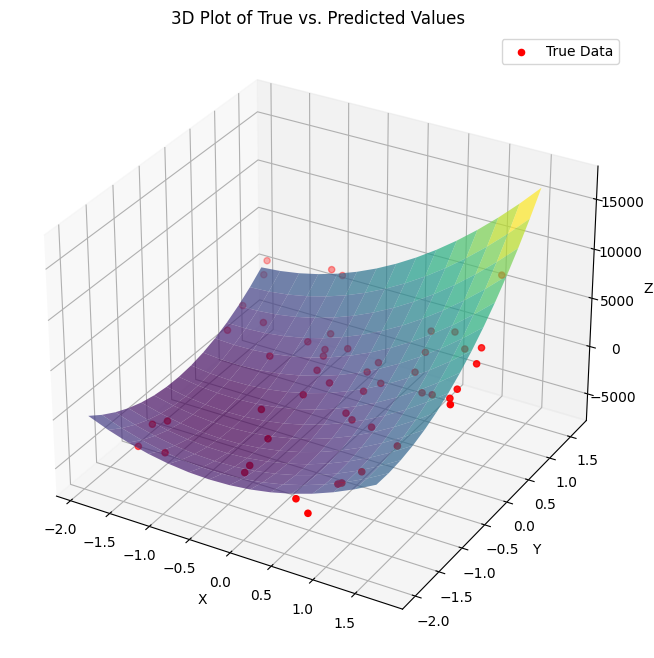

In [105]:
M=2
DesignMatrix= design_matrix_2D(X_train,M)
w=W_min(DesignMatrix,Y_train)
w_reg=Wmin_reg(DesignMatrix,Y_train,0.1)
y_pred=predict(DesignMatrix,w)
Train_err=ERMS(Y_train,y_pred)
print("Train_err:",Train_err)
Val_DesignMatrix= design_matrix_2D(X_val,M)
yval_pred=predict(Val_DesignMatrix,w)
val_err=ERMS(Y_val,yval_pred)
print("val_err",val_err)
test_DesignMatrix= design_matrix_2D(X_test,M)
ytest_pred=predict(test_DesignMatrix,w)
test_err=ERMS(Y_test,ytest_pred)
print("test_err",test_err)
true_vs_predicted(Y_test, ytest_pred, title='Scatter plot of True vs. Predicted Values')
print("3D plot for Train data")
plot_3d(X_train, Y_train, M, w, colormap='viridis', alpha=0.7, x_label='X', y_label='Y', z_label='Z')
print("3D plot for Test data")
plot_3d(X_test, Y_test, M, w, colormap='viridis', alpha=0.7, x_label='X', y_label='Y', z_label='Z')

Train_err: 13.49336681997728
val_err 7.481292869227013
test_err 8.052610760286651


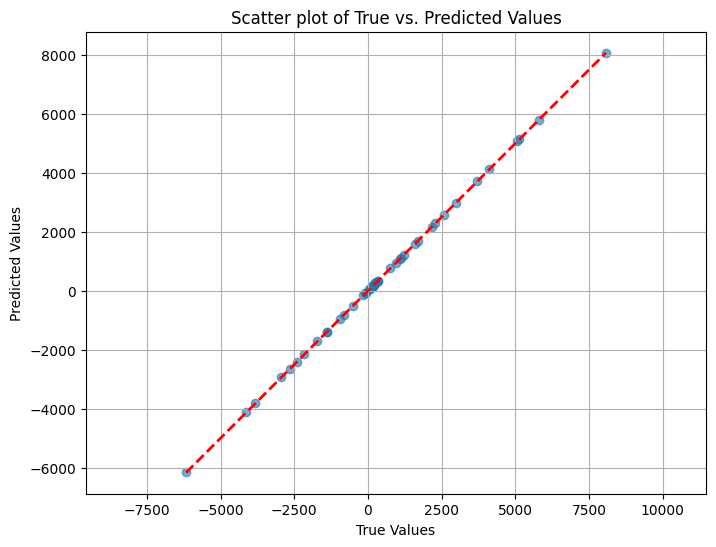

3D plot for Train data


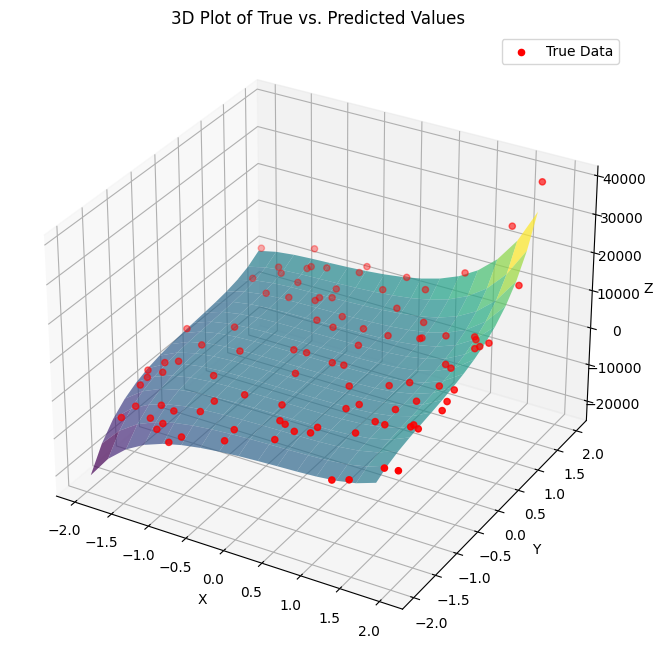

3D plot for Test data


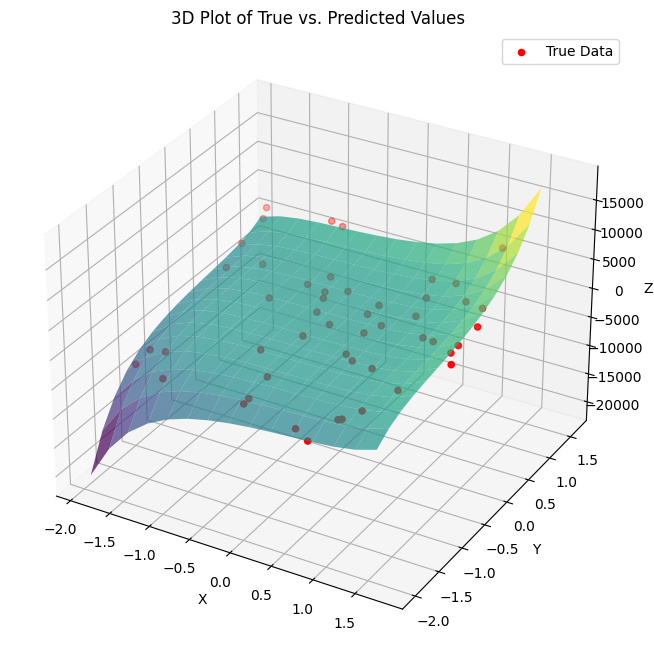

In [106]:
M=6
DesignMatrix= design_matrix_2D(X_train,M)
w=W_min(DesignMatrix,Y_train)
w_reg=Wmin_reg(DesignMatrix,Y_train,0.1)
y_pred=predict(DesignMatrix,w)
Train_err=ERMS(Y_train,y_pred)
print("Train_err:",Train_err)
Val_DesignMatrix= design_matrix_2D(X_val,M)
yval_pred=predict(Val_DesignMatrix,w)
val_err=ERMS(Y_val,yval_pred)
print("val_err",val_err)
test_DesignMatrix= design_matrix_2D(X_test,M)
ytest_pred=predict(test_DesignMatrix,w)
test_err=ERMS(Y_test,ytest_pred)
print("test_err",test_err)
true_vs_predicted(Y_test, ytest_pred, title='Scatter plot of True vs. Predicted Values')
print("3D plot for Train data")
plot_3d(X_train, Y_train, M, w, colormap='viridis', alpha=0.7, x_label='X', y_label='Y', z_label='Z')
print("3D plot for Test data")
plot_3d(X_test, Y_test, M, w, colormap='viridis', alpha=0.7, x_label='X', y_label='Y', z_label='Z')

### With Regularization

Train_err: 13.493370463787427
val_err 7.486626803407363
test_err 8.052756250754877


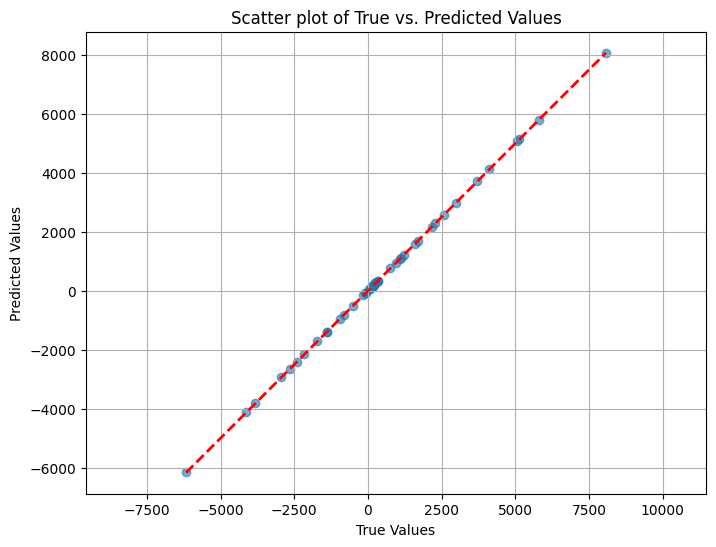

3D plot for Train data


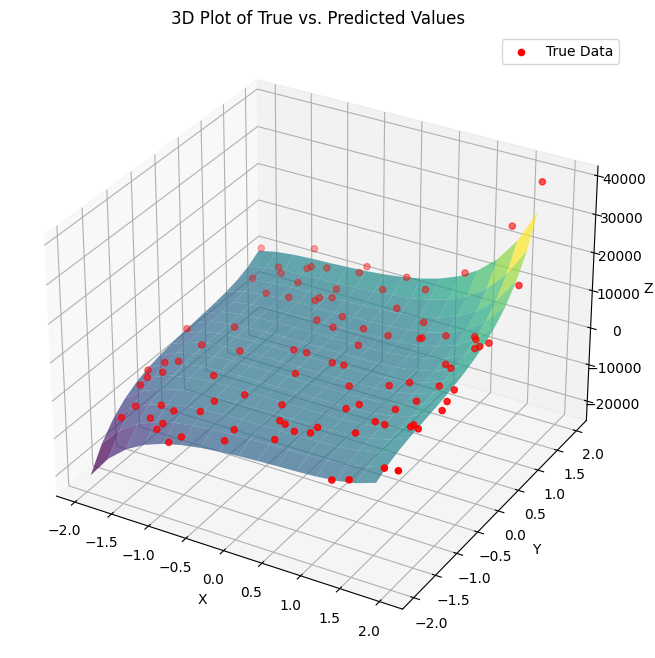

3D plot for Test data


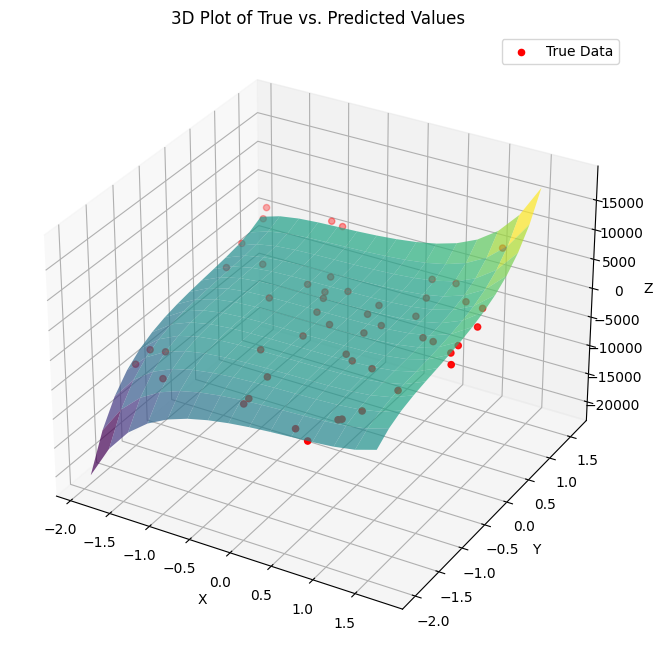

In [107]:
M=6
lam=0.001

DesignMatrix= design_matrix_2D(X_train,M)
w=Wmin_reg(DesignMatrix,Y_train,lam)
y_pred=predict(DesignMatrix,w)
Train_err=ERMS(Y_train,y_pred)
print("Train_err:",Train_err)
Val_DesignMatrix= design_matrix_2D(X_val,M)
yval_pred=predict(Val_DesignMatrix,w)
val_err=ERMS(Y_val,yval_pred)
print("val_err",val_err)
test_DesignMatrix= design_matrix_2D(X_test,M)
ytest_pred=predict(test_DesignMatrix,w)
test_err=ERMS(Y_test,ytest_pred)
print("test_err",test_err)
true_vs_predicted(Y_test, ytest_pred, title='Scatter plot of True vs. Predicted Values')
print("3D plot for Train data")
plot_3d(X_train, Y_train, M, w, colormap='viridis', alpha=0.7, x_label='X', y_label='Y', z_label='Z')
print("3D plot for Test data")
plot_3d(X_test, Y_test, M, w, colormap='viridis', alpha=0.7, x_label='X', y_label='Y', z_label='Z')

Train_err: 13.528313476359504
val_err 8.10540878096103
test_err 8.162154090199921


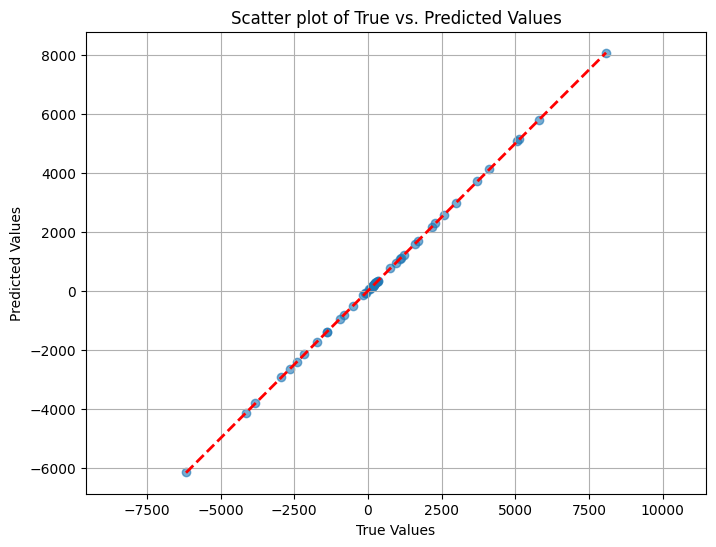

3D plot for Train data


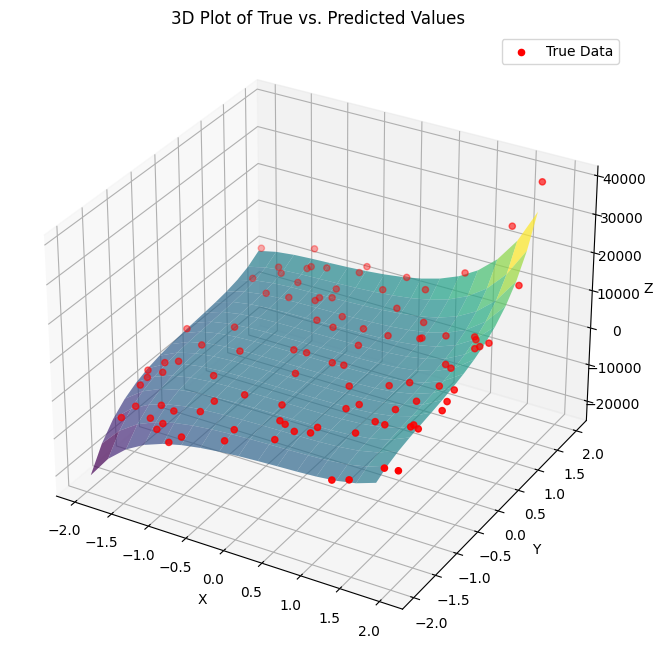

3D plot for Test data


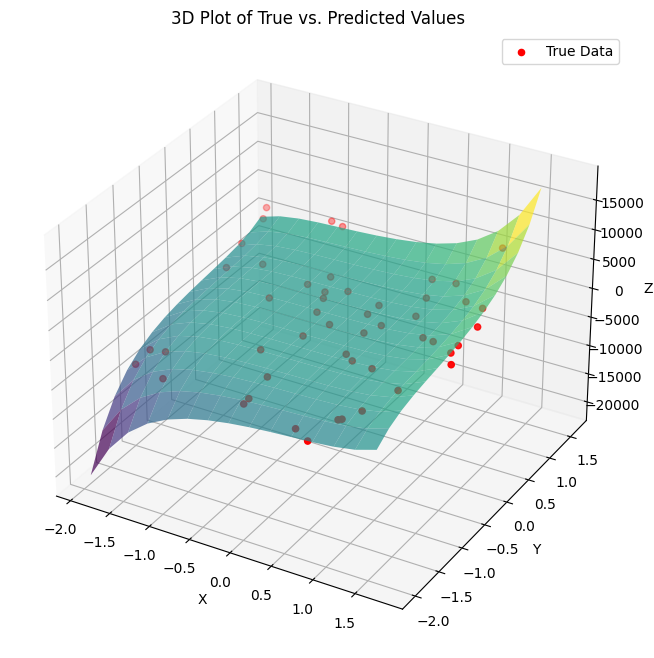

In [108]:
M=6
lam=0.1

DesignMatrix= design_matrix_2D(X_train,M)
w=Wmin_reg(DesignMatrix,Y_train,lam)
y_pred=predict(DesignMatrix,w)
Train_err=ERMS(Y_train,y_pred)
print("Train_err:",Train_err)
Val_DesignMatrix= design_matrix_2D(X_val,M)
yval_pred=predict(Val_DesignMatrix,w)
val_err=ERMS(Y_val,yval_pred)
print("val_err",val_err)
test_DesignMatrix= design_matrix_2D(X_test,M)
ytest_pred=predict(test_DesignMatrix,w)
test_err=ERMS(Y_test,ytest_pred)
print("test_err",test_err)
true_vs_predicted(Y_test, ytest_pred, title='Scatter plot of True vs. Predicted Values')
print("3D plot for Train data")
plot_3d(X_train, Y_train, M, w, colormap='viridis', alpha=0.7, x_label='X', y_label='Y', z_label='Z')
print("3D plot for Test data")
plot_3d(X_test, Y_test, M, w, colormap='viridis', alpha=0.7, x_label='X', y_label='Y', z_label='Z')

Train_err: 16.08058210402508
val_err 16.442681033435044
test_err 13.731522936123316


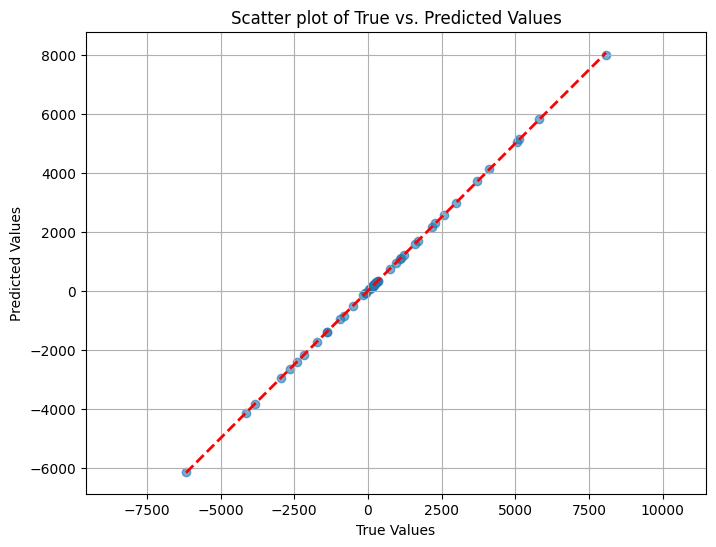

3D plot for Train data


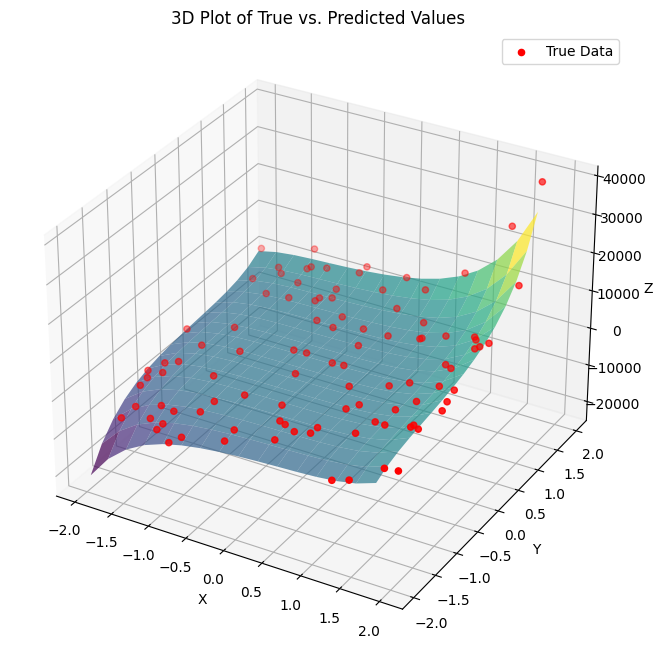

3D plot for Test data


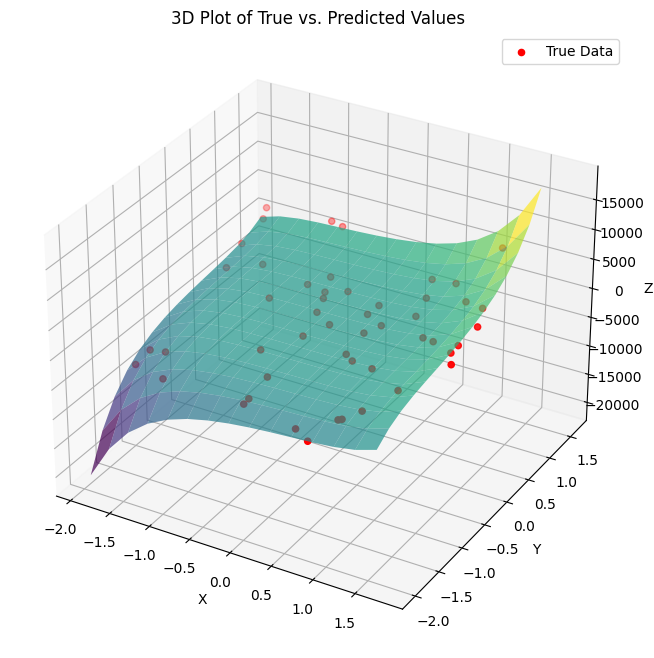

In [109]:
M=6
lam=1

DesignMatrix= design_matrix_2D(X_train,M)
w=Wmin_reg(DesignMatrix,Y_train,lam)
y_pred=predict(DesignMatrix,w)
Train_err=ERMS(Y_train,y_pred)
print("Train_err:",Train_err)
Val_DesignMatrix= design_matrix_2D(X_val,M)
yval_pred=predict(Val_DesignMatrix,w)
val_err=ERMS(Y_val,yval_pred)
print("val_err",val_err)
test_DesignMatrix= design_matrix_2D(X_test,M)
ytest_pred=predict(test_DesignMatrix,w)
test_err=ERMS(Y_test,ytest_pred)
print("test_err",test_err)
true_vs_predicted(Y_test, ytest_pred, title='Scatter plot of True vs. Predicted Values')
print("3D plot for Train data")
plot_3d(X_train, Y_train, M, w, colormap='viridis', alpha=0.7, x_label='X', y_label='Y', z_label='Z')
print("3D plot for Test data")
plot_3d(X_test, Y_test, M, w, colormap='viridis', alpha=0.7, x_label='X', y_label='Y', z_label='Z')

In [110]:
degrees = [2, 4, 6]
lambdas = [0.001, 0.1, 1]


results = []

min_erms = float('inf')
best_M = None
best_lambda = None
# Initialize list to store results
results = []

# Compute ERMS for models without regularization (degrees 2, 4, 6)
for degree in degrees:
    DesignMatrix_train = design_matrix_2D(X_train, degree)
    DesignMatrix_val = design_matrix_2D(X_val, degree)
    DesignMatrix_test = design_matrix_2D(X_test, degree)

    w = W_min(DesignMatrix_train, Y_train)

    # Predict and calculate ERMS
    y_pred_train = predict(DesignMatrix_train, w)
    y_pred_val = predict(DesignMatrix_val, w)
    y_pred_test = predict(DesignMatrix_test, w)

    train_err = ERMS(Y_train, y_pred_train)
    val_err = ERMS(Y_val, y_pred_val)
    test_err = ERMS(Y_test, y_pred_test)
    if test_err < min_erms:
      min_erms = test_err
      best_M = degree
      best_lambda = 'None'
    results.append(['Dataset 1', degree, 'None', train_err, val_err, test_err])

# Compute ERMS for degree 6 with regularization (λ = 0.001, 0.1, 1)
degree = 6
for lambda_reg in lambdas:
    DesignMatrix_train = design_matrix_2D(X_train, degree)
    DesignMatrix_val = design_matrix_2D(X_val, degree)
    DesignMatrix_test = design_matrix_2D(X_test, degree)

    w_reg = Wmin_reg(DesignMatrix_train, Y_train, lambda_reg)

    # Predict and calculate ERMS
    y_pred_train = predict(DesignMatrix_train, w_reg)
    y_pred_val = predict(DesignMatrix_val, w_reg)
    y_pred_test = predict(DesignMatrix_test, w_reg)

    train_err = ERMS(Y_train, y_pred_train)
    val_err = ERMS(Y_val, y_pred_val)
    test_err = ERMS(Y_test, y_pred_test)
    if test_err < min_erms:
      min_erms = test_err
      best_M = degree
      best_lambda = lambda_reg

    results.append(['Dataset 1', degree, lambda_reg, train_err, val_err, test_err])

# Create a DataFrame to display results
df_results = pd.DataFrame(results, columns=['Dataset', 'Degree of Polynomial', 'Regularization Coefficient λ',
                                            'ERMS (Training)', 'ERMS (Validation)', 'ERMS (Test)'])

# Display the table

print(df_results)
print("\n")
print(f"Best Model is with M={best_M} and lambda={best_lambda} with test error of {min_erms}")

     Dataset  Degree of Polynomial Regularization Coefficient λ  \
0  Dataset 1                     2                         None   
1  Dataset 1                     4                         None   
2  Dataset 1                     6                         None   
3  Dataset 1                     6                        0.001   
4  Dataset 1                     6                          0.1   
5  Dataset 1                     6                            1   

   ERMS (Training)  ERMS (Validation)  ERMS (Test)  
0      2766.975033        2270.600245  2049.713579  
1       357.631952         427.806601   410.411206  
2        13.493367           7.481293     8.052611  
3        13.493370           7.486627     8.052756  
4        13.528313           8.105409     8.162154  
5        16.080582          16.442681    13.731523  


Best Model is with M=6 and lambda=None with test error of 8.052610760286651


# Ques 3

### Function For Multivariable input

In [117]:

def loaddata(data_loc, lbl_loc):
    """Loads the data from the given file paths."""
    X = pd.read_csv(data_loc, header=None).values
    Y = pd.read_csv(lbl_loc, header=None).values.reshape(-1, 1)
    return X, Y

def design_matrix_multivariate(X, degree):
    """Computes the design matrix for multivariate polynomial regression."""
    from itertools import combinations_with_replacement

    n_samples = X.shape[0]
    n_features = X.shape[1]

    # Calculate the number of polynomial features
    poly_features = [np.ones(n_samples)]  # Bias term (column of ones)

    for d in range(1, degree + 1):
        for comb in combinations_with_replacement(range(n_features), d):
            poly_features.append(np.prod(X[:, comb], axis=1))

    return np.vstack(poly_features).T

def W_min_no_regularization(dMatrix, y):
    return np.linalg.pinv(dMatrix.T @ dMatrix) @ dMatrix.T @ y

def W_min_with_regularization(dMatrix, y, lambda_reg):
    n = dMatrix.shape[1]
    I = np.eye(n)
    return np.linalg.pinv(dMatrix.T @ dMatrix + lambda_reg * I) @ dMatrix.T @ y

def predict(dMatrix, w):
    return dMatrix @ w

def ERMS(y, y_pred):
    return np.sqrt(np.mean((y - y_pred) ** 2))

In [116]:


train_data_loc = '/content/drive/MyDrive/PRML/team14/dataset3/train_data.csv'
train_lbl_loc = '/content/drive/MyDrive/PRML/team14/dataset3/train_label.csv'
X_train, Y_train = loaddata(train_data_loc, train_lbl_loc)

v_data_loc = '/content/drive/MyDrive/PRML/team14/dataset3/val_data.csv'
v_lbl_loc = '/content/drive/MyDrive/PRML/team14/dataset3/val_label.csv'
X_val, Y_val = loaddata(v_data_loc, v_lbl_loc)

test_data_loc = '/content/drive/MyDrive/PRML/team14/dataset3/test_data.csv'
test_lbl_loc = '/content/drive/MyDrive/PRML/team14/dataset3/test_label.csv'
X_test, Y_test = loaddata(test_data_loc, test_lbl_loc)


In [124]:
M_list=[2,3]
lambdas = [0.001, 0.1, 1]
# Create a list to store the results
results = []

min_erms = float('inf')
best_M = None
best_lambda = None

for M in M_list:
  for lam in lambdas:
    print(f"M={M}, lambda={lam}")
    DesignMatrix_train = design_matrix_multivariate(X_train, M)
    w_reg = W_min_with_regularization(DesignMatrix_train, Y_train, lam)
    w_no_reg=W_min_no_regularization(DesignMatrix_train, Y_train)
    # Training predictions and error
    y_pred_train_no_reg = predict(DesignMatrix_train, w_no_reg)
    train_err_no_reg = ERMS(Y_train, y_pred_train_no_reg)
    print(f"Training ERMS (No Regularization): {train_err_no_reg}")

    y_pred_train_reg = predict(DesignMatrix_train, w_reg)
    train_err_reg = ERMS(Y_train, y_pred_train_reg)
    print(f"Training ERMS (With Regularization): {train_err_reg}")

    # Validation predictions and error
    DesignMatrix_val = design_matrix_multivariate(X_val, M)
    y_pred_val_no_reg = predict(DesignMatrix_val, w_no_reg)
    val_err_no_reg = ERMS(Y_val, y_pred_val_no_reg)
    print(f"Validation ERMS (No Regularization): {val_err_no_reg}")

    y_pred_val_reg = predict(DesignMatrix_val, w_reg)
    val_err_reg = ERMS(Y_val, y_pred_val_reg)
    print(f"Validation ERMS (With Regularization): {val_err_reg}")

    # Test predictions and error
    DesignMatrix_test = design_matrix_multivariate(X_test, M)
    y_pred_test_no_reg = predict(DesignMatrix_test, w_no_reg)
    test_err_no_reg = ERMS(Y_test, y_pred_test_no_reg)
    print(f"Test ERMS (No Regularization): {test_err_no_reg}")
    if test_err_no_reg < min_erms:
      min_erms = test_err_no_reg
      best_M = M
      best_lambda = 0
    results.append({
        "Dataset": "Dataset 1",
        "Degree of Polynomial": M,
        "Regularization Coefficient λ": "None",
        "ERMS (Training)": train_err_no_reg,
        "ERMS (Validation)": val_err_no_reg,
        "ERMS (Test)": test_err_no_reg
        })

    y_pred_test_reg = predict(DesignMatrix_test, w_reg)
    test_err_reg = ERMS(Y_test, y_pred_test_reg)
    print(f"Test ERMS (With Regularization): {test_err_reg}")
    print(" \n")
    print(" \n")
    # Append results to the list
    results.append({
        "Dataset": "Dataset 1",
        "Degree of Polynomial": M,
        "Regularization Coefficient λ": lam,
        "ERMS (Training)": train_err_reg,
        "ERMS (Validation)": val_err_reg,
        "ERMS (Test)": test_err_reg
        })
    if test_err_reg < min_erms:
      min_erms = test_err_reg
      best_M = M
      best_lambda = lam

# Create a DataFrame from the results list
df = pd.DataFrame(results)

# Print the DataFrame as a table
print(df.to_markdown(index=False))
print(f"Best Model is with M={best_M} and lambda={best_lambda} with test error of {min_erms}")

M=2, lambda=0.001
Training ERMS (No Regularization): 0.4624185495991116
Training ERMS (With Regularization): 0.4626321503283334
Validation ERMS (No Regularization): 0.4936138738710967
Validation ERMS (With Regularization): 0.4928054499050634
Test ERMS (No Regularization): 0.5831193638743538
Test ERMS (With Regularization): 0.5895826847318245
 

 

M=2, lambda=0.1
Training ERMS (No Regularization): 0.4624185495991116
Training ERMS (With Regularization): 0.4639013672748658
Validation ERMS (No Regularization): 0.4936138738710967
Validation ERMS (With Regularization): 0.49351689780102254
Test ERMS (No Regularization): 0.5831193638743538
Test ERMS (With Regularization): 0.598979383588682
 

 

M=2, lambda=1
Training ERMS (No Regularization): 0.4624185495991116
Training ERMS (With Regularization): 0.46492094100174153
Validation ERMS (No Regularization): 0.4936138738710967
Validation ERMS (With Regularization): 0.4986947673867211
Test ERMS (No Regularization): 0.5831193638743538
Test ERMS (Wi

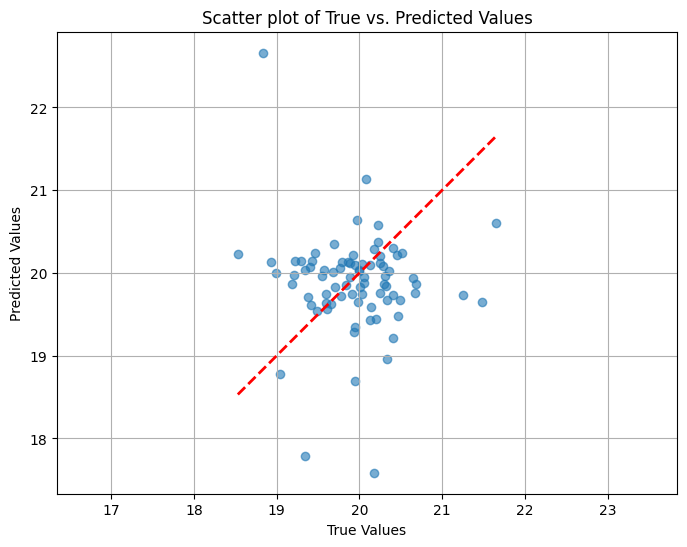

In [119]:
true_vs_predicted(Y_test, y_pred_test_reg, title='Scatter plot of True vs. Predicted Values')